In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import keras
import matplotlib.pyplot as plt
import sklearn
from collections import Counter

Using TensorFlow backend.


In [58]:
import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [59]:
! ls
%cd Data

[WinError 2] O sistema não pode encontrar o arquivo especificado: 'Data'
C:\Users\SAMSUNG\Documents\Machine Learning\2 CASA\4 - Kaggle\01 Titanic Machine Learning from Disaster\Data


'ls' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


In [60]:
ls

 O volume na unidade C ‚ SISTEMA
 O N£mero de S‚rie do Volume ‚ 12FF-27CD

 Pasta de C:\Users\SAMSUNG\Documents\Machine Learning\2 CASA\4 - Kaggle\01 Titanic Machine Learning from Disaster\Data

20/05/2020  09:24    <DIR>          .
20/05/2020  09:24    <DIR>          ..
11/12/2019  02:17             3.258 gender_submission.csv
11/12/2019  02:17            28.629 test.csv
20/05/2020  08:50            34.877 titanic.zip
11/12/2019  02:17            61.194 train.csv
               4 arquivo(s)        127.958 bytes
               2 pasta(s)   697.108.844.544 bytes dispon¡veis


In [61]:
ls

 O volume na unidade C ‚ SISTEMA
 O N£mero de S‚rie do Volume ‚ 12FF-27CD

 Pasta de C:\Users\SAMSUNG\Documents\Machine Learning\2 CASA\4 - Kaggle\01 Titanic Machine Learning from Disaster\Data

20/05/2020  09:24    <DIR>          .
20/05/2020  09:24    <DIR>          ..
11/12/2019  02:17             3.258 gender_submission.csv
11/12/2019  02:17            28.629 test.csv
20/05/2020  08:50            34.877 titanic.zip
11/12/2019  02:17            61.194 train.csv
               4 arquivo(s)        127.958 bytes
               2 pasta(s)   697.108.844.544 bytes dispon¡veis


In [62]:
# Vamos carregar os dados
training_set = pd.read_csv('train.csv')
test_st = pd.read_csv('test.csv')

In [63]:
training_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [64]:
from sklearn.preprocessing import OneHotEncoder

In [65]:
# Vamos assumir que os seguintes atributos não têm efeito na sobrevivência do indivíduo:
# *PassengerId
# *Name
# *Ticket
# *Cabin
X_train = training_set
X_train = X_train.drop(labels=['PassengerId','Name','Ticket','Cabin'], axis=1)

In [66]:
# Vamos verificar a quantidade de NaN no atributo Age:
X_train['Age'].isnull().sum()/len(X_train['Age'])*100

19.865319865319865

In [67]:
# Vemos que 20% dos dados em 'Age' estão perdidos, existem duas opções:
# retirar todos os indivíduos sem idade ou imputar uma média

In [68]:
X_train_imputed = X_train

In [69]:
# Vamos tirar os NaNs na idade, IMPUTANDO A MÉDIA 
X_train_imputed['Age'].fillna(X_train_imputed['Age'].mean(), inplace=True)
X_train_imputed

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [70]:
# Vemos que existem passageiros os quais não sabemos se embarcaram ou não
X_train_imputed['Embarked'].isnull().sum()

2

In [71]:
# Vamos retirá-los
X_train_imputed.dropna(inplace=True)
X_train_imputed

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [72]:
oneHotEncoding = OneHotEncoder()
X_train_imputed['Sex'] = oneHotEncoding.fit_transform(X_train_imputed['Sex'].values.reshape(-1,1)).toarray()

In [73]:
oneHotEncoding = OneHotEncoder(categories=[0,1,2])
oneHotEncoding

OneHotEncoder(categories=[0, 1, 2], drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [74]:
Counter(X_train_imputed['Embarked']).keys()

dict_keys(['S', 'C', 'Q'])

In [75]:
X_train_imputed['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object

In [76]:
code,_ = pd.factorize(X_train_imputed['Embarked'])
X_train_imputed['Embarked'] = code

In [77]:
X_train_imputed

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0.0,22.000000,1,0,7.2500,0
1,1,1,1.0,38.000000,1,0,71.2833,1
2,1,3,1.0,26.000000,0,0,7.9250,0
3,1,1,1.0,35.000000,1,0,53.1000,0
4,0,3,0.0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0.0,27.000000,0,0,13.0000,0
887,1,1,1.0,19.000000,0,0,30.0000,0
888,0,3,1.0,29.699118,1,2,23.4500,0
889,1,1,0.0,26.000000,0,0,30.0000,1


In [78]:
X_train_imputed

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0.0,22.000000,1,0,7.2500,0
1,1,1,1.0,38.000000,1,0,71.2833,1
2,1,3,1.0,26.000000,0,0,7.9250,0
3,1,1,1.0,35.000000,1,0,53.1000,0
4,0,3,0.0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0.0,27.000000,0,0,13.0000,0
887,1,1,1.0,19.000000,0,0,30.0000,0
888,0,3,1.0,29.699118,1,2,23.4500,0
889,1,1,0.0,26.000000,0,0,30.0000,1


In [79]:
y_train_imputed = X_train_imputed['Survived']
X_train_imputed = X_train_imputed.drop(labels=['Survived'], axis=1)

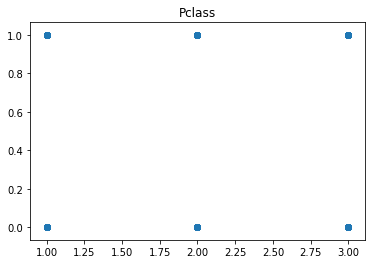

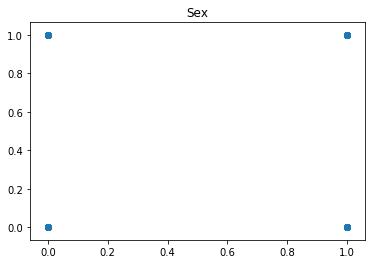

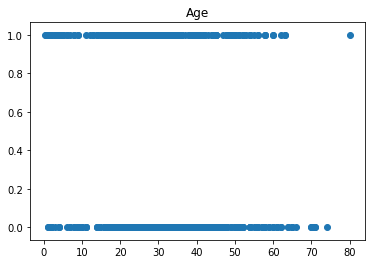

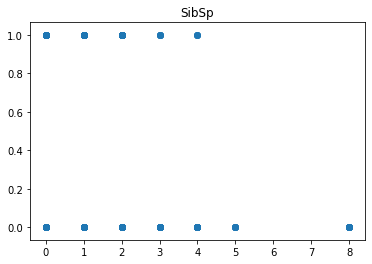

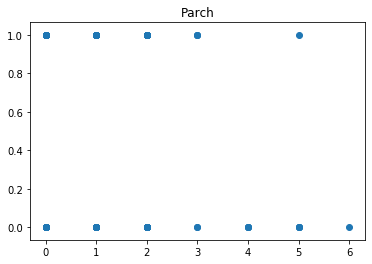

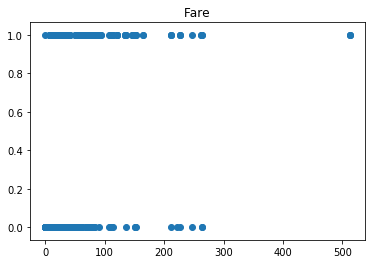

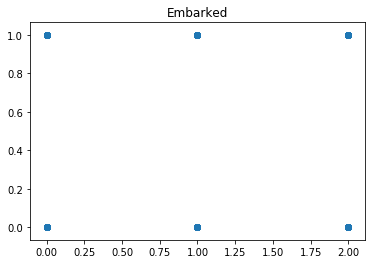

<Figure size 432x288 with 0 Axes>

In [80]:
for head in X_train_imputed.columns:
    plt.scatter(X_train_imputed[head].values, y_train_imputed)
    plt.title(head)
    plt.figure()

In [81]:
sc = sklearn.preprocessing.StandardScaler()
X_train_imputed = sc.fit_transform(X_train_imputed)

In [82]:
X_train_imputed[:,1]

array([-0.73534203,  1.35991138,  1.35991138,  1.35991138, -0.73534203,
       -0.73534203, -0.73534203, -0.73534203,  1.35991138,  1.35991138,
        1.35991138,  1.35991138, -0.73534203, -0.73534203,  1.35991138,
        1.35991138, -0.73534203, -0.73534203,  1.35991138,  1.35991138,
       -0.73534203, -0.73534203,  1.35991138, -0.73534203,  1.35991138,
        1.35991138, -0.73534203, -0.73534203,  1.35991138, -0.73534203,
       -0.73534203,  1.35991138,  1.35991138, -0.73534203, -0.73534203,
       -0.73534203, -0.73534203, -0.73534203,  1.35991138,  1.35991138,
        1.35991138,  1.35991138, -0.73534203,  1.35991138,  1.35991138,
       -0.73534203, -0.73534203,  1.35991138, -0.73534203,  1.35991138,
       -0.73534203, -0.73534203,  1.35991138,  1.35991138, -0.73534203,
       -0.73534203,  1.35991138, -0.73534203,  1.35991138, -0.73534203,
       -0.73534203, -0.73534203, -0.73534203, -0.73534203, -0.73534203,
        1.35991138, -0.73534203,  1.35991138, -0.73534203, -0.73

In [83]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [84]:
ann = Sequential()

In [85]:
ann.add(Dense(units=100,
              activation='relu',
              kernel_initializer='uniform',
              bias_initializer='uniform',
              input_shape=(X_train_imputed.shape[1],)))
ann.add(Dense(units=50,
              activation='relu',
              kernel_initializer='uniform',
              bias_initializer='uniform'))
ann.add(Dense(units=40,
              activation='relu',
              kernel_initializer='uniform',
              bias_initializer='uniform'))
ann.add(Dense(units=30,
              activation='relu',
              kernel_initializer='uniform',
              bias_initializer='uniform'))
ann.add(Dense(units=1,
              activation='sigmoid',
              kernel_initializer='uniform',
              bias_initializer='uniform'))

In [86]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [87]:
y = np.array(y_train_imputed)

In [88]:
ann.fit(X_train_imputed,y,batch_size=889,epochs=1000)

Epoch 1/1000
889/889 [==============================] - 1s 1ms/step - loss: 0.6957 - accuracy: 0.3825
Epoch 2/1000
889/889 [==============================] - 0s 11us/step - loss: 0.6954 - accuracy: 0.3825
Epoch 3/1000
889/889 [==============================] - 0s 10us/step - loss: 0.6952 - accuracy: 0.3825
Epoch 4/1000
889/889 [==============================] - 0s 15us/step - loss: 0.6949 - accuracy: 0.3825
Epoch 5/1000
889/889 [==============================] - 0s 10us/step - loss: 0.6946 - accuracy: 0.3825
Epoch 6/1000
889/889 [==============================] - 0s 10us/step - loss: 0.6944 - accuracy: 0.3825
Epoch 7/1000
889/889 [==============================] - 0s 12us/step - loss: 0.6941 - accuracy: 0.3825
Epoch 8/1000
889/889 [==============================] - 0s 12us/step - loss: 0.6938 - accuracy: 0.3825
Epoch 9/1000
889/889 [==============================] - 0s 13us/step - loss: 0.6935 - accuracy: 0.3825
Epoch 10/1000
889/889 [==============================] - 0s 9us/step - los

Epoch 80/1000
889/889 [==============================] - 0s 10us/step - loss: 0.4878 - accuracy: 0.8211
Epoch 81/1000
889/889 [==============================] - 0s 10us/step - loss: 0.4859 - accuracy: 0.8223
Epoch 82/1000
889/889 [==============================] - 0s 11us/step - loss: 0.4838 - accuracy: 0.8234
Epoch 83/1000
889/889 [==============================] - 0s 10us/step - loss: 0.4817 - accuracy: 0.8234
Epoch 84/1000
889/889 [==============================] - 0s 10us/step - loss: 0.4793 - accuracy: 0.8245
Epoch 85/1000
889/889 [==============================] - 0s 10us/step - loss: 0.4767 - accuracy: 0.8223
Epoch 86/1000
889/889 [==============================] - 0s 11us/step - loss: 0.4740 - accuracy: 0.8223
Epoch 87/1000
889/889 [==============================] - 0s 10us/step - loss: 0.4711 - accuracy: 0.8234
Epoch 88/1000
889/889 [==============================] - 0s 12us/step - loss: 0.4681 - accuracy: 0.8234
Epoch 89/1000
889/889 [==============================] - 0s 12us

Epoch 159/1000
889/889 [==============================] - 0s 9us/step - loss: 0.3679 - accuracy: 0.8504
Epoch 160/1000
889/889 [==============================] - 0s 9us/step - loss: 0.3673 - accuracy: 0.8481
Epoch 161/1000
889/889 [==============================] - 0s 10us/step - loss: 0.3668 - accuracy: 0.8481
Epoch 162/1000
889/889 [==============================] - 0s 12us/step - loss: 0.3663 - accuracy: 0.8493
Epoch 163/1000
889/889 [==============================] - 0s 12us/step - loss: 0.3657 - accuracy: 0.8538
Epoch 164/1000
889/889 [==============================] - 0s 11us/step - loss: 0.3652 - accuracy: 0.8526
Epoch 165/1000
889/889 [==============================] - 0s 9us/step - loss: 0.3647 - accuracy: 0.8504
Epoch 166/1000
889/889 [==============================] - 0s 9us/step - loss: 0.3642 - accuracy: 0.8493
Epoch 167/1000
889/889 [==============================] - 0s 11us/step - loss: 0.3637 - accuracy: 0.8493
Epoch 168/1000
889/889 [==============================] - 0

889/889 [==============================] - 0s 12us/step - loss: 0.3224 - accuracy: 0.8830
Epoch 238/1000
889/889 [==============================] - 0s 12us/step - loss: 0.3218 - accuracy: 0.8819
Epoch 239/1000
889/889 [==============================] - 0s 11us/step - loss: 0.3210 - accuracy: 0.8830
Epoch 240/1000
889/889 [==============================] - 0s 11us/step - loss: 0.3210 - accuracy: 0.8841
Epoch 241/1000
889/889 [==============================] - 0s 11us/step - loss: 0.3198 - accuracy: 0.8830
Epoch 242/1000
889/889 [==============================] - 0s 11us/step - loss: 0.3197 - accuracy: 0.8819
Epoch 243/1000
889/889 [==============================] - 0s 11us/step - loss: 0.3190 - accuracy: 0.8819
Epoch 244/1000
889/889 [==============================] - 0s 10us/step - loss: 0.3182 - accuracy: 0.8808
Epoch 245/1000
889/889 [==============================] - 0s 10us/step - loss: 0.3182 - accuracy: 0.8830
Epoch 246/1000
889/889 [==============================] - 0s 10us/step

Epoch 316/1000
889/889 [==============================] - 0s 10us/step - loss: 0.2950 - accuracy: 0.8886
Epoch 317/1000
889/889 [==============================] - 0s 10us/step - loss: 0.2941 - accuracy: 0.8864
Epoch 318/1000
889/889 [==============================] - 0s 10us/step - loss: 0.2948 - accuracy: 0.8886
Epoch 319/1000
889/889 [==============================] - 0s 11us/step - loss: 0.2938 - accuracy: 0.8886
Epoch 320/1000
889/889 [==============================] - 0s 9us/step - loss: 0.2938 - accuracy: 0.8875
Epoch 321/1000
889/889 [==============================] - 0s 12us/step - loss: 0.2937 - accuracy: 0.8875
Epoch 322/1000
889/889 [==============================] - 0s 11us/step - loss: 0.2930 - accuracy: 0.8886
Epoch 323/1000
889/889 [==============================] - 0s 12us/step - loss: 0.2934 - accuracy: 0.8875
Epoch 324/1000
889/889 [==============================] - 0s 10us/step - loss: 0.2930 - accuracy: 0.8785
Epoch 325/1000
889/889 [==============================] 

Epoch 395/1000
889/889 [==============================] - 0s 11us/step - loss: 0.2763 - accuracy: 0.8965
Epoch 396/1000
889/889 [==============================] - 0s 9us/step - loss: 0.2764 - accuracy: 0.8943
Epoch 397/1000
889/889 [==============================] - 0s 9us/step - loss: 0.2784 - accuracy: 0.8931
Epoch 398/1000
889/889 [==============================] - 0s 10us/step - loss: 0.2780 - accuracy: 0.8988
Epoch 399/1000
889/889 [==============================] - 0s 10us/step - loss: 0.2762 - accuracy: 0.8954
Epoch 400/1000
889/889 [==============================] - 0s 9us/step - loss: 0.2747 - accuracy: 0.8931
Epoch 401/1000
889/889 [==============================] - 0s 13us/step - loss: 0.2754 - accuracy: 0.8954
Epoch 402/1000
889/889 [==============================] - 0s 9us/step - loss: 0.2766 - accuracy: 0.8943
Epoch 403/1000
889/889 [==============================] - 0s 10us/step - loss: 0.2760 - accuracy: 0.8954
Epoch 404/1000
889/889 [==============================] - 0

889/889 [==============================] - 0s 9us/step - loss: 0.2625 - accuracy: 0.8976
Epoch 474/1000
889/889 [==============================] - 0s 9us/step - loss: 0.2618 - accuracy: 0.9021
Epoch 475/1000
889/889 [==============================] - 0s 12us/step - loss: 0.2617 - accuracy: 0.8931
Epoch 476/1000
889/889 [==============================] - 0s 13us/step - loss: 0.2598 - accuracy: 0.8988
Epoch 477/1000
889/889 [==============================] - 0s 12us/step - loss: 0.2586 - accuracy: 0.9010
Epoch 478/1000
889/889 [==============================] - 0s 11us/step - loss: 0.2597 - accuracy: 0.8976
Epoch 479/1000
889/889 [==============================] - 0s 11us/step - loss: 0.2605 - accuracy: 0.9033
Epoch 480/1000
889/889 [==============================] - 0s 10us/step - loss: 0.2618 - accuracy: 0.8976
Epoch 481/1000
889/889 [==============================] - 0s 10us/step - loss: 0.2601 - accuracy: 0.9055
Epoch 482/1000
889/889 [==============================] - 0s 9us/step - 

Epoch 552/1000
889/889 [==============================] - 0s 11us/step - loss: 0.2469 - accuracy: 0.9066
Epoch 553/1000
889/889 [==============================] - 0s 12us/step - loss: 0.2469 - accuracy: 0.9055
Epoch 554/1000
889/889 [==============================] - 0s 9us/step - loss: 0.2467 - accuracy: 0.9055
Epoch 555/1000
889/889 [==============================] - 0s 11us/step - loss: 0.2470 - accuracy: 0.9033
Epoch 556/1000
889/889 [==============================] - 0s 8us/step - loss: 0.2462 - accuracy: 0.9078
Epoch 557/1000
889/889 [==============================] - 0s 12us/step - loss: 0.2461 - accuracy: 0.9055
Epoch 558/1000
889/889 [==============================] - 0s 9us/step - loss: 0.2462 - accuracy: 0.9066
Epoch 559/1000
889/889 [==============================] - 0s 9us/step - loss: 0.2458 - accuracy: 0.9078
Epoch 560/1000
889/889 [==============================] - 0s 12us/step - loss: 0.2458 - accuracy: 0.9033
Epoch 561/1000
889/889 [==============================] - 0

Epoch 709/1000
889/889 [==============================] - 0s 13us/step - loss: 0.2256 - accuracy: 0.9168
Epoch 710/1000
889/889 [==============================] - 0s 13us/step - loss: 0.2240 - accuracy: 0.9134
Epoch 711/1000
889/889 [==============================] - 0s 15us/step - loss: 0.2238 - accuracy: 0.9145
Epoch 712/1000
889/889 [==============================] - 0s 12us/step - loss: 0.2241 - accuracy: 0.9123
Epoch 713/1000
889/889 [==============================] - 0s 10us/step - loss: 0.2235 - accuracy: 0.9089
Epoch 714/1000
889/889 [==============================] - 0s 11us/step - loss: 0.2229 - accuracy: 0.9145
Epoch 715/1000
889/889 [==============================] - 0s 11us/step - loss: 0.2231 - accuracy: 0.9190
Epoch 716/1000
889/889 [==============================] - 0s 8us/step - loss: 0.2231 - accuracy: 0.9134
Epoch 717/1000
889/889 [==============================] - 0s 12us/step - loss: 0.2226 - accuracy: 0.9100
Epoch 718/1000
889/889 [==============================] 

889/889 [==============================] - 0s 11us/step - loss: 0.2121 - accuracy: 0.9201
Epoch 866/1000
889/889 [==============================] - 0s 15us/step - loss: 0.2099 - accuracy: 0.9190
Epoch 867/1000
889/889 [==============================] - 0s 10us/step - loss: 0.2100 - accuracy: 0.9179
Epoch 868/1000
889/889 [==============================] - 0s 12us/step - loss: 0.2099 - accuracy: 0.9235
Epoch 869/1000
889/889 [==============================] - 0s 11us/step - loss: 0.2112 - accuracy: 0.9201
Epoch 870/1000
889/889 [==============================] - 0s 12us/step - loss: 0.2113 - accuracy: 0.9213
Epoch 871/1000
889/889 [==============================] - 0s 15us/step - loss: 0.2109 - accuracy: 0.9201
Epoch 872/1000
889/889 [==============================] - 0s 11us/step - loss: 0.2129 - accuracy: 0.9190
Epoch 873/1000
889/889 [==============================] - 0s 10us/step - loss: 0.2089 - accuracy: 0.9213
Epoch 874/1000
889/889 [==============================] - 0s 9us/step 

Epoch 944/1000
889/889 [==============================] - 0s 12us/step - loss: 0.2044 - accuracy: 0.9246
Epoch 945/1000
889/889 [==============================] - 0s 12us/step - loss: 0.2044 - accuracy: 0.9201
Epoch 946/1000
889/889 [==============================] - 0s 12us/step - loss: 0.2036 - accuracy: 0.9235
Epoch 947/1000
889/889 [==============================] - 0s 12us/step - loss: 0.2042 - accuracy: 0.9201
Epoch 948/1000
889/889 [==============================] - 0s 10us/step - loss: 0.2036 - accuracy: 0.9224
Epoch 949/1000
889/889 [==============================] - 0s 9us/step - loss: 0.2034 - accuracy: 0.9224
Epoch 950/1000
889/889 [==============================] - 0s 11us/step - loss: 0.2034 - accuracy: 0.9224
Epoch 951/1000
889/889 [==============================] - 0s 10us/step - loss: 0.2028 - accuracy: 0.9235
Epoch 952/1000
889/889 [==============================] - 0s 11us/step - loss: 0.2031 - accuracy: 0.9201
Epoch 953/1000
889/889 [==============================] 

In [89]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping

In [90]:
def build_classifier():
    ann = Sequential()
    ann.add(Dense(units=512,
                  activation='relu',
                  kernel_initializer='uniform',
                  bias_initializer='uniform',
                  input_shape=(X_train_imputed.shape[1],)))
    ann.add(Dropout(rate=0.18))
    ann.add(Dense(units=512,
                  activation='relu',
                  kernel_initializer='uniform',
                  bias_initializer='uniform'))
    ann.add(Dropout(rate=0.18))
    ann.add(Dense(units=512,
                  activation='relu',
                  kernel_initializer='uniform',
                  bias_initializer='uniform'))
#     ann.add(Dropout(rate=0.1))
#     ann.add(Dense(units=512,
#                   activation='relu',
#                   kernel_initializer='uniform',
#                   bias_initializer='uniform'))
    ann.add(Dense(units=1,
                  activation='sigmoid',
                  kernel_initializer='uniform',
                  bias_initializer='uniform'))
    ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return ann

In [91]:
monitor = EarlyStopping(monitor='accuracy', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

In [92]:
classifier = KerasClassifier(build_fn=build_classifier,batch_size=800, epochs=1000)

In [93]:
parameters = {'batch_size':[899],
              'epochs':[600]}

In [94]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid= parameters,
                           scoring = 'accuracy',
                           cv = 10)

In [95]:
accuracies = cross_val_score(classifier,X_train_imputed, y_train_imputed, cv=15)

Epoch 1/1000
829/829 [==============================] - 0s 411us/step - loss: 0.6934 - accuracy: 0.3908
Epoch 2/1000
829/829 [==============================] - 0s 42us/step - loss: 0.6634 - accuracy: 0.6321
Epoch 3/1000
829/829 [==============================] - 0s 46us/step - loss: 0.6268 - accuracy: 0.6815
Epoch 4/1000
829/829 [==============================] - 0s 45us/step - loss: 0.5741 - accuracy: 0.7455
Epoch 5/1000
829/829 [==============================] - 0s 47us/step - loss: 0.5139 - accuracy: 0.8070
Epoch 6/1000
829/829 [==============================] - 0s 53us/step - loss: 0.4739 - accuracy: 0.8118
Epoch 7/1000
829/829 [==============================] - 0s 47us/step - loss: 0.4609 - accuracy: 0.7961
Epoch 8/1000
829/829 [==============================] - 0s 47us/step - loss: 0.4750 - accuracy: 0.7877
Epoch 9/1000
829/829 [==============================] - 0s 49us/step - loss: 0.4960 - accuracy: 0.7877
Epoch 10/1000
829/829 [==============================] - 0s 49us/step - 

Epoch 157/1000
829/829 [==============================] - 0s 52us/step - loss: 0.3628 - accuracy: 0.8456
Epoch 158/1000
829/829 [==============================] - 0s 42us/step - loss: 0.3603 - accuracy: 0.8335
Epoch 159/1000
829/829 [==============================] - 0s 46us/step - loss: 0.3574 - accuracy: 0.8468
Epoch 160/1000
829/829 [==============================] - 0s 45us/step - loss: 0.3520 - accuracy: 0.8540
Epoch 161/1000
829/829 [==============================] - 0s 45us/step - loss: 0.3579 - accuracy: 0.8432
Epoch 162/1000
829/829 [==============================] - 0s 42us/step - loss: 0.3573 - accuracy: 0.8480
Epoch 163/1000
829/829 [==============================] - 0s 47us/step - loss: 0.3537 - accuracy: 0.8504
Epoch 164/1000
829/829 [==============================] - 0s 46us/step - loss: 0.3522 - accuracy: 0.8480
Epoch 165/1000
829/829 [==============================] - 0s 46us/step - loss: 0.3540 - accuracy: 0.8444
Epoch 166/1000
829/829 [==============================]

829/829 [==============================] - 0s 51us/step - loss: 0.3343 - accuracy: 0.8589
Epoch 236/1000
829/829 [==============================] - 0s 47us/step - loss: 0.3413 - accuracy: 0.8456
Epoch 237/1000
829/829 [==============================] - 0s 42us/step - loss: 0.3426 - accuracy: 0.8516
Epoch 238/1000
829/829 [==============================] - 0s 45us/step - loss: 0.3326 - accuracy: 0.8540
Epoch 239/1000
829/829 [==============================] - 0s 43us/step - loss: 0.3377 - accuracy: 0.8565
Epoch 240/1000
829/829 [==============================] - 0s 45us/step - loss: 0.3359 - accuracy: 0.8516
Epoch 241/1000
829/829 [==============================] - 0s 43us/step - loss: 0.3301 - accuracy: 0.8528
Epoch 242/1000
829/829 [==============================] - 0s 45us/step - loss: 0.3354 - accuracy: 0.8528
Epoch 243/1000
829/829 [==============================] - 0s 43us/step - loss: 0.3368 - accuracy: 0.8516
Epoch 244/1000
829/829 [==============================] - 0s 43us/step

829/829 [==============================] - 0s 42us/step - loss: 0.3072 - accuracy: 0.8745
Epoch 391/1000
829/829 [==============================] - 0s 40us/step - loss: 0.3064 - accuracy: 0.8601
Epoch 392/1000
829/829 [==============================] - 0s 42us/step - loss: 0.3132 - accuracy: 0.8697
Epoch 393/1000
829/829 [==============================] - 0s 41us/step - loss: 0.3190 - accuracy: 0.8721
Epoch 394/1000
829/829 [==============================] - 0s 42us/step - loss: 0.3229 - accuracy: 0.8758
Epoch 395/1000
829/829 [==============================] - 0s 43us/step - loss: 0.3177 - accuracy: 0.8758
Epoch 396/1000
829/829 [==============================] - 0s 43us/step - loss: 0.3127 - accuracy: 0.8806
Epoch 397/1000
829/829 [==============================] - 0s 45us/step - loss: 0.3090 - accuracy: 0.8794
Epoch 398/1000
829/829 [==============================] - 0s 42us/step - loss: 0.3161 - accuracy: 0.8697
Epoch 399/1000
829/829 [==============================] - 0s 42us/step

829/829 [==============================] - 0s 42us/step - loss: 0.2910 - accuracy: 0.8830
Epoch 547/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2916 - accuracy: 0.8770
Epoch 548/1000
829/829 [==============================] - 0s 42us/step - loss: 0.2843 - accuracy: 0.8866
Epoch 549/1000
829/829 [==============================] - 0s 40us/step - loss: 0.2824 - accuracy: 0.8770
Epoch 550/1000
829/829 [==============================] - 0s 39us/step - loss: 0.2787 - accuracy: 0.8830
Epoch 551/1000
829/829 [==============================] - 0s 43us/step - loss: 0.2789 - accuracy: 0.8878
Epoch 552/1000
829/829 [==============================] - 0s 40us/step - loss: 0.2866 - accuracy: 0.8733
Epoch 553/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2915 - accuracy: 0.8770
Epoch 554/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2902 - accuracy: 0.8830
Epoch 555/1000
829/829 [==============================] - 0s 40us/step

829/829 [==============================] - 0s 42us/step - loss: 0.2782 - accuracy: 0.8902
Epoch 703/1000
829/829 [==============================] - 0s 40us/step - loss: 0.2811 - accuracy: 0.8830
Epoch 704/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2806 - accuracy: 0.8938
Epoch 705/1000
829/829 [==============================] - 0s 42us/step - loss: 0.2783 - accuracy: 0.8818
Epoch 706/1000
829/829 [==============================] - 0s 40us/step - loss: 0.2804 - accuracy: 0.8818
Epoch 707/1000
829/829 [==============================] - 0s 40us/step - loss: 0.2784 - accuracy: 0.8854
Epoch 708/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2875 - accuracy: 0.8806
Epoch 709/1000
829/829 [==============================] - 0s 42us/step - loss: 0.2852 - accuracy: 0.8878
Epoch 710/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2818 - accuracy: 0.8794
Epoch 711/1000
829/829 [==============================] - 0s 41us/step

Epoch 858/1000
829/829 [==============================] - 0s 57us/step - loss: 0.2643 - accuracy: 0.8914
Epoch 859/1000
829/829 [==============================] - 0s 53us/step - loss: 0.2713 - accuracy: 0.8806
Epoch 860/1000
829/829 [==============================] - 0s 57us/step - loss: 0.2645 - accuracy: 0.8975
Epoch 861/1000
829/829 [==============================] - 0s 59us/step - loss: 0.2669 - accuracy: 0.8914
Epoch 862/1000
829/829 [==============================] - 0s 55us/step - loss: 0.2661 - accuracy: 0.8902
Epoch 863/1000
829/829 [==============================] - 0s 71us/step - loss: 0.2713 - accuracy: 0.8878
Epoch 864/1000
829/829 [==============================] - 0s 75us/step - loss: 0.2746 - accuracy: 0.8758
Epoch 865/1000
829/829 [==============================] - 0s 63us/step - loss: 0.2772 - accuracy: 0.8806
Epoch 866/1000
829/829 [==============================] - 0s 54us/step - loss: 0.2723 - accuracy: 0.8818
Epoch 867/1000
829/829 [==============================]

829/829 [==============================] - 0s 47us/step - loss: 0.4405 - accuracy: 0.8130
Epoch 13/1000
829/829 [==============================] - 0s 59us/step - loss: 0.4328 - accuracy: 0.8130
Epoch 14/1000
829/829 [==============================] - 0s 48us/step - loss: 0.4333 - accuracy: 0.8166
Epoch 15/1000
829/829 [==============================] - 0s 47us/step - loss: 0.4251 - accuracy: 0.8215
Epoch 16/1000
829/829 [==============================] - 0s 52us/step - loss: 0.4209 - accuracy: 0.8275
Epoch 17/1000
829/829 [==============================] - 0s 47us/step - loss: 0.4173 - accuracy: 0.8359
Epoch 18/1000
829/829 [==============================] - 0s 55us/step - loss: 0.4117 - accuracy: 0.8299
Epoch 19/1000
829/829 [==============================] - 0s 55us/step - loss: 0.4094 - accuracy: 0.8239
Epoch 20/1000
829/829 [==============================] - 0s 49us/step - loss: 0.4089 - accuracy: 0.8251
Epoch 21/1000
829/829 [==============================] - 0s 63us/step - loss: 

829/829 [==============================] - 0s 54us/step - loss: 0.4051 - accuracy: 0.8444
Epoch 91/1000
829/829 [==============================] - 0s 58us/step - loss: 0.4040 - accuracy: 0.8492
Epoch 92/1000
829/829 [==============================] - 0s 52us/step - loss: 0.3897 - accuracy: 0.8444
Epoch 93/1000
829/829 [==============================] - 0s 70us/step - loss: 0.3768 - accuracy: 0.8504
Epoch 94/1000
829/829 [==============================] - 0s 55us/step - loss: 0.3867 - accuracy: 0.8372
Epoch 95/1000
829/829 [==============================] - 0s 69us/step - loss: 0.4081 - accuracy: 0.8203
Epoch 96/1000
829/829 [==============================] - 0s 58us/step - loss: 0.4131 - accuracy: 0.8227
Epoch 97/1000
829/829 [==============================] - 0s 54us/step - loss: 0.4017 - accuracy: 0.8251
Epoch 98/1000
829/829 [==============================] - 0s 55us/step - loss: 0.3952 - accuracy: 0.8359
Epoch 99/1000
829/829 [==============================] - 0s 63us/step - loss: 

829/829 [==============================] - 0s 51us/step - loss: 0.3460 - accuracy: 0.8589
Epoch 246/1000
829/829 [==============================] - 0s 49us/step - loss: 0.3479 - accuracy: 0.8528
Epoch 247/1000
829/829 [==============================] - 0s 52us/step - loss: 0.3466 - accuracy: 0.8504
Epoch 248/1000
829/829 [==============================] - 0s 57us/step - loss: 0.3481 - accuracy: 0.8504
Epoch 249/1000
829/829 [==============================] - 0s 52us/step - loss: 0.3581 - accuracy: 0.8540
Epoch 250/1000
829/829 [==============================] - 0s 57us/step - loss: 0.3648 - accuracy: 0.8492
Epoch 251/1000
829/829 [==============================] - 0s 59us/step - loss: 0.3548 - accuracy: 0.8516
Epoch 252/1000
829/829 [==============================] - 0s 49us/step - loss: 0.3477 - accuracy: 0.8528
Epoch 253/1000
829/829 [==============================] - 0s 48us/step - loss: 0.3400 - accuracy: 0.8528
Epoch 254/1000
829/829 [==============================] - 0s 51us/step

829/829 [==============================] - 0s 46us/step - loss: 0.3203 - accuracy: 0.8589
Epoch 401/1000
829/829 [==============================] - 0s 47us/step - loss: 0.3209 - accuracy: 0.8637
Epoch 402/1000
829/829 [==============================] - 0s 48us/step - loss: 0.3248 - accuracy: 0.8625
Epoch 403/1000
829/829 [==============================] - 0s 47us/step - loss: 0.3213 - accuracy: 0.8733
Epoch 404/1000
829/829 [==============================] - 0s 47us/step - loss: 0.3193 - accuracy: 0.8625
Epoch 405/1000
829/829 [==============================] - 0s 53us/step - loss: 0.3247 - accuracy: 0.8528
Epoch 406/1000
829/829 [==============================] - 0s 47us/step - loss: 0.3215 - accuracy: 0.8649
Epoch 407/1000
829/829 [==============================] - 0s 70us/step - loss: 0.3228 - accuracy: 0.8625
Epoch 408/1000
829/829 [==============================] - 0s 52us/step - loss: 0.3164 - accuracy: 0.8577
Epoch 409/1000
829/829 [==============================] - 0s 48us/step

829/829 [==============================] - 0s 42us/step - loss: 0.3120 - accuracy: 0.8709
Epoch 556/1000
829/829 [==============================] - 0s 42us/step - loss: 0.3095 - accuracy: 0.8589
Epoch 557/1000
829/829 [==============================] - 0s 42us/step - loss: 0.3144 - accuracy: 0.8733
Epoch 558/1000
829/829 [==============================] - 0s 43us/step - loss: 0.3094 - accuracy: 0.8637
Epoch 559/1000
829/829 [==============================] - 0s 42us/step - loss: 0.3135 - accuracy: 0.8649
Epoch 560/1000
829/829 [==============================] - 0s 43us/step - loss: 0.3106 - accuracy: 0.8661
Epoch 561/1000
829/829 [==============================] - 0s 42us/step - loss: 0.3138 - accuracy: 0.8709
Epoch 562/1000
829/829 [==============================] - 0s 42us/step - loss: 0.3182 - accuracy: 0.8625
Epoch 563/1000
829/829 [==============================] - 0s 42us/step - loss: 0.3229 - accuracy: 0.8637
Epoch 564/1000
829/829 [==============================] - 0s 43us/step

829/829 [==============================] - 0s 43us/step - loss: 0.3052 - accuracy: 0.8758
Epoch 712/1000
829/829 [==============================] - 0s 43us/step - loss: 0.3039 - accuracy: 0.8661
Epoch 713/1000
829/829 [==============================] - 0s 42us/step - loss: 0.2985 - accuracy: 0.8709
Epoch 714/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2970 - accuracy: 0.8661
Epoch 715/1000
829/829 [==============================] - 0s 43us/step - loss: 0.2939 - accuracy: 0.8745
Epoch 716/1000
829/829 [==============================] - 0s 42us/step - loss: 0.2967 - accuracy: 0.8758
Epoch 717/1000
829/829 [==============================] - 0s 42us/step - loss: 0.2924 - accuracy: 0.8782
Epoch 718/1000
829/829 [==============================] - 0s 40us/step - loss: 0.2892 - accuracy: 0.8733
Epoch 719/1000
829/829 [==============================] - 0s 43us/step - loss: 0.2872 - accuracy: 0.8709
Epoch 720/1000
829/829 [==============================] - 0s 42us/step

829/829 [==============================] - 0s 42us/step - loss: 0.2707 - accuracy: 0.8951
Epoch 868/1000
829/829 [==============================] - 0s 43us/step - loss: 0.2756 - accuracy: 0.8806
Epoch 869/1000
829/829 [==============================] - 0s 42us/step - loss: 0.2807 - accuracy: 0.8878
Epoch 870/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2662 - accuracy: 0.8830
Epoch 871/1000
829/829 [==============================] - 0s 43us/step - loss: 0.2748 - accuracy: 0.8830
Epoch 872/1000
829/829 [==============================] - 0s 42us/step - loss: 0.2763 - accuracy: 0.8806
Epoch 873/1000
829/829 [==============================] - 0s 40us/step - loss: 0.2712 - accuracy: 0.8830
Epoch 874/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2732 - accuracy: 0.8866
Epoch 875/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2753 - accuracy: 0.8842
Epoch 876/1000
829/829 [==============================] - 0s 42us/step

829/829 [==============================] - 0s 41us/step - loss: 0.4092 - accuracy: 0.8287
Epoch 23/1000
829/829 [==============================] - 0s 43us/step - loss: 0.4102 - accuracy: 0.8227
Epoch 24/1000
829/829 [==============================] - 0s 41us/step - loss: 0.4107 - accuracy: 0.8251
Epoch 25/1000
829/829 [==============================] - 0s 40us/step - loss: 0.4141 - accuracy: 0.8287
Epoch 26/1000
829/829 [==============================] - 0s 40us/step - loss: 0.4185 - accuracy: 0.8311
Epoch 27/1000
829/829 [==============================] - 0s 41us/step - loss: 0.4099 - accuracy: 0.8311
Epoch 28/1000
829/829 [==============================] - 0s 41us/step - loss: 0.4066 - accuracy: 0.8311
Epoch 29/1000
829/829 [==============================] - 0s 42us/step - loss: 0.4019 - accuracy: 0.8347
Epoch 30/1000
829/829 [==============================] - 0s 42us/step - loss: 0.4182 - accuracy: 0.8203
Epoch 31/1000
829/829 [==============================] - 0s 40us/step - loss: 

829/829 [==============================] - 0s 40us/step - loss: 0.3618 - accuracy: 0.8444
Epoch 179/1000
829/829 [==============================] - 0s 41us/step - loss: 0.3612 - accuracy: 0.8420
Epoch 180/1000
829/829 [==============================] - 0s 41us/step - loss: 0.3650 - accuracy: 0.8408
Epoch 181/1000
829/829 [==============================] - 0s 41us/step - loss: 0.3705 - accuracy: 0.8372
Epoch 182/1000
829/829 [==============================] - 0s 41us/step - loss: 0.3764 - accuracy: 0.8384
Epoch 183/1000
829/829 [==============================] - 0s 40us/step - loss: 0.3643 - accuracy: 0.8468
Epoch 184/1000
829/829 [==============================] - 0s 42us/step - loss: 0.3651 - accuracy: 0.8456
Epoch 185/1000
829/829 [==============================] - 0s 41us/step - loss: 0.3594 - accuracy: 0.8492
Epoch 186/1000
829/829 [==============================] - 0s 42us/step - loss: 0.3569 - accuracy: 0.8492
Epoch 187/1000
829/829 [==============================] - 0s 41us/step

829/829 [==============================] - 0s 40us/step - loss: 0.3337 - accuracy: 0.8613
Epoch 335/1000
829/829 [==============================] - 0s 43us/step - loss: 0.3231 - accuracy: 0.8733
Epoch 336/1000
829/829 [==============================] - 0s 42us/step - loss: 0.3212 - accuracy: 0.8770
Epoch 337/1000
829/829 [==============================] - 0s 41us/step - loss: 0.3325 - accuracy: 0.8637
Epoch 338/1000
829/829 [==============================] - 0s 41us/step - loss: 0.3317 - accuracy: 0.8601
Epoch 339/1000
829/829 [==============================] - 0s 41us/step - loss: 0.3270 - accuracy: 0.8685
Epoch 340/1000
829/829 [==============================] - 0s 42us/step - loss: 0.3285 - accuracy: 0.8709
Epoch 341/1000
829/829 [==============================] - 0s 41us/step - loss: 0.3279 - accuracy: 0.8745
Epoch 342/1000
829/829 [==============================] - 0s 40us/step - loss: 0.3269 - accuracy: 0.8649
Epoch 343/1000
829/829 [==============================] - 0s 40us/step

829/829 [==============================] - 0s 48us/step - loss: 0.2976 - accuracy: 0.8685
Epoch 491/1000
829/829 [==============================] - 0s 47us/step - loss: 0.3001 - accuracy: 0.8782
Epoch 492/1000
829/829 [==============================] - 0s 45us/step - loss: 0.3029 - accuracy: 0.8673
Epoch 493/1000
829/829 [==============================] - 0s 53us/step - loss: 0.2981 - accuracy: 0.8733
Epoch 494/1000
829/829 [==============================] - 0s 47us/step - loss: 0.3019 - accuracy: 0.8733
Epoch 495/1000
829/829 [==============================] - 0s 42us/step - loss: 0.3037 - accuracy: 0.8818
Epoch 496/1000
829/829 [==============================] - ETA: 0s - loss: 0.3052 - accuracy: 0.87 - 0s 42us/step - loss: 0.3058 - accuracy: 0.8758
Epoch 497/1000
829/829 [==============================] - 0s 45us/step - loss: 0.3095 - accuracy: 0.8806
Epoch 498/1000
829/829 [==============================] - 0s 43us/step - loss: 0.3134 - accuracy: 0.8770
Epoch 499/1000
829/829 [====

829/829 [==============================] - 0s 45us/step - loss: 0.3024 - accuracy: 0.8770
Epoch 646/1000
829/829 [==============================] - 0s 42us/step - loss: 0.3154 - accuracy: 0.8649
Epoch 647/1000
829/829 [==============================] - 0s 42us/step - loss: 0.3138 - accuracy: 0.8733
Epoch 648/1000
829/829 [==============================] - 0s 39us/step - loss: 0.3122 - accuracy: 0.8649
Epoch 649/1000
829/829 [==============================] - 0s 41us/step - loss: 0.3035 - accuracy: 0.8721
Epoch 650/1000
829/829 [==============================] - 0s 42us/step - loss: 0.3065 - accuracy: 0.8709
Epoch 651/1000
829/829 [==============================] - 0s 42us/step - loss: 0.2939 - accuracy: 0.8794
Epoch 652/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2946 - accuracy: 0.8770
Epoch 653/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2982 - accuracy: 0.8721
Epoch 654/1000
829/829 [==============================] - 0s 41us/step

829/829 [==============================] - 0s 42us/step - loss: 0.2776 - accuracy: 0.8745
Epoch 802/1000
829/829 [==============================] - 0s 42us/step - loss: 0.2815 - accuracy: 0.8806
Epoch 803/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2812 - accuracy: 0.8770
Epoch 804/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2769 - accuracy: 0.8758
Epoch 805/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2809 - accuracy: 0.8721
Epoch 806/1000
829/829 [==============================] - 0s 42us/step - loss: 0.2771 - accuracy: 0.8758
Epoch 807/1000
829/829 [==============================] - 0s 42us/step - loss: 0.2849 - accuracy: 0.8601
Epoch 808/1000
829/829 [==============================] - 0s 40us/step - loss: 0.2824 - accuracy: 0.8733
Epoch 809/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2736 - accuracy: 0.8721
Epoch 810/1000
829/829 [==============================] - 0s 41us/step

829/829 [==============================] - 0s 40us/step - loss: 0.2711 - accuracy: 0.8902
Epoch 957/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2769 - accuracy: 0.8878
Epoch 958/1000
829/829 [==============================] - 0s 40us/step - loss: 0.2713 - accuracy: 0.8878
Epoch 959/1000
829/829 [==============================] - 0s 39us/step - loss: 0.2709 - accuracy: 0.8914
Epoch 960/1000
829/829 [==============================] - 0s 42us/step - loss: 0.2686 - accuracy: 0.8854
Epoch 961/1000
829/829 [==============================] - 0s 40us/step - loss: 0.2672 - accuracy: 0.8818
Epoch 962/1000
829/829 [==============================] - 0s 40us/step - loss: 0.2699 - accuracy: 0.8806
Epoch 963/1000
829/829 [==============================] - 0s 40us/step - loss: 0.2763 - accuracy: 0.8866
Epoch 964/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2786 - accuracy: 0.8902
Epoch 965/1000
829/829 [==============================] - 0s 42us/step

829/829 [==============================] - 0s 42us/step - loss: 0.4073 - accuracy: 0.8347
Epoch 35/1000
829/829 [==============================] - 0s 41us/step - loss: 0.4018 - accuracy: 0.8480
Epoch 36/1000
829/829 [==============================] - 0s 42us/step - loss: 0.4033 - accuracy: 0.8396
Epoch 37/1000
829/829 [==============================] - 0s 43us/step - loss: 0.3989 - accuracy: 0.8408
Epoch 38/1000
829/829 [==============================] - 0s 45us/step - loss: 0.3969 - accuracy: 0.8420
Epoch 39/1000
829/829 [==============================] - 0s 53us/step - loss: 0.4017 - accuracy: 0.8432
Epoch 40/1000
829/829 [==============================] - 0s 46us/step - loss: 0.3988 - accuracy: 0.8408
Epoch 41/1000
829/829 [==============================] - 0s 47us/step - loss: 0.3999 - accuracy: 0.8384
Epoch 42/1000
829/829 [==============================] - 0s 45us/step - loss: 0.3970 - accuracy: 0.8432
Epoch 43/1000
829/829 [==============================] - 0s 48us/step - loss: 

829/829 [==============================] - 0s 43us/step - loss: 0.3385 - accuracy: 0.8577
Epoch 191/1000
829/829 [==============================] - 0s 41us/step - loss: 0.3372 - accuracy: 0.8613
Epoch 192/1000
829/829 [==============================] - 0s 42us/step - loss: 0.3421 - accuracy: 0.8492
Epoch 193/1000
829/829 [==============================] - 0s 41us/step - loss: 0.3451 - accuracy: 0.8540
Epoch 194/1000
829/829 [==============================] - 0s 40us/step - loss: 0.3416 - accuracy: 0.8589
Epoch 195/1000
829/829 [==============================] - 0s 41us/step - loss: 0.3388 - accuracy: 0.8540
Epoch 196/1000
829/829 [==============================] - 0s 41us/step - loss: 0.3442 - accuracy: 0.8528
Epoch 197/1000
829/829 [==============================] - 0s 41us/step - loss: 0.3472 - accuracy: 0.8528
Epoch 198/1000
829/829 [==============================] - 0s 42us/step - loss: 0.3388 - accuracy: 0.8540
Epoch 199/1000
829/829 [==============================] - 0s 41us/step

829/829 [==============================] - 0s 41us/step - loss: 0.3166 - accuracy: 0.8589
Epoch 347/1000
829/829 [==============================] - 0s 43us/step - loss: 0.3130 - accuracy: 0.8625
Epoch 348/1000
829/829 [==============================] - 0s 41us/step - loss: 0.3133 - accuracy: 0.8625
Epoch 349/1000
829/829 [==============================] - 0s 41us/step - loss: 0.3116 - accuracy: 0.8709
Epoch 350/1000
829/829 [==============================] - 0s 41us/step - loss: 0.3167 - accuracy: 0.8625
Epoch 351/1000
829/829 [==============================] - 0s 41us/step - loss: 0.3016 - accuracy: 0.8733
Epoch 352/1000
829/829 [==============================] - 0s 43us/step - loss: 0.2989 - accuracy: 0.8794
Epoch 353/1000
829/829 [==============================] - 0s 40us/step - loss: 0.3161 - accuracy: 0.8649
Epoch 354/1000
829/829 [==============================] - 0s 43us/step - loss: 0.3134 - accuracy: 0.8649
Epoch 355/1000
829/829 [==============================] - 0s 41us/step

829/829 [==============================] - 0s 43us/step - loss: 0.2901 - accuracy: 0.8818
Epoch 503/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2833 - accuracy: 0.8878
Epoch 504/1000
829/829 [==============================] - 0s 42us/step - loss: 0.2871 - accuracy: 0.8866
Epoch 505/1000
829/829 [==============================] - 0s 43us/step - loss: 0.2836 - accuracy: 0.8854
Epoch 506/1000
829/829 [==============================] - 0s 42us/step - loss: 0.2843 - accuracy: 0.8842
Epoch 507/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2803 - accuracy: 0.8818
Epoch 508/1000
829/829 [==============================] - 0s 42us/step - loss: 0.2793 - accuracy: 0.8830
Epoch 509/1000
829/829 [==============================] - 0s 42us/step - loss: 0.2804 - accuracy: 0.8854
Epoch 510/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2824 - accuracy: 0.8866
Epoch 511/1000
829/829 [==============================] - 0s 41us/step

829/829 [==============================] - 0s 41us/step - loss: 0.2774 - accuracy: 0.8806
Epoch 659/1000
829/829 [==============================] - 0s 42us/step - loss: 0.2696 - accuracy: 0.8878
Epoch 660/1000
829/829 [==============================] - 0s 42us/step - loss: 0.2734 - accuracy: 0.8842
Epoch 661/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2723 - accuracy: 0.8842
Epoch 662/1000
829/829 [==============================] - 0s 42us/step - loss: 0.2711 - accuracy: 0.8866
Epoch 663/1000
829/829 [==============================] - 0s 40us/step - loss: 0.2908 - accuracy: 0.8782
Epoch 664/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2803 - accuracy: 0.8866
Epoch 665/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2741 - accuracy: 0.8878
Epoch 666/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2681 - accuracy: 0.8818
Epoch 667/1000
829/829 [==============================] - 0s 42us/step

829/829 [==============================] - 0s 42us/step - loss: 0.2586 - accuracy: 0.8890
Epoch 815/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2591 - accuracy: 0.8842
Epoch 816/1000
829/829 [==============================] - 0s 42us/step - loss: 0.2560 - accuracy: 0.8987
Epoch 817/1000
829/829 [==============================] - 0s 40us/step - loss: 0.2652 - accuracy: 0.8926
Epoch 818/1000
829/829 [==============================] - 0s 42us/step - loss: 0.2648 - accuracy: 0.8926
Epoch 819/1000
829/829 [==============================] - 0s 42us/step - loss: 0.2668 - accuracy: 0.8854
Epoch 820/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2562 - accuracy: 0.8902
Epoch 821/1000
829/829 [==============================] - 0s 42us/step - loss: 0.2560 - accuracy: 0.8866
Epoch 822/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2554 - accuracy: 0.8866
Epoch 823/1000
829/829 [==============================] - 0s 42us/step

829/829 [==============================] - 0s 40us/step - loss: 0.2391 - accuracy: 0.8938
Epoch 971/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2344 - accuracy: 0.8999
Epoch 972/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2410 - accuracy: 0.9011
Epoch 973/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2426 - accuracy: 0.9011
Epoch 974/1000
829/829 [==============================] - 0s 42us/step - loss: 0.2480 - accuracy: 0.8975
Epoch 975/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2428 - accuracy: 0.9011
Epoch 976/1000
829/829 [==============================] - 0s 41us/step - loss: 0.2336 - accuracy: 0.9071
Epoch 977/1000
829/829 [==============================] - 0s 43us/step - loss: 0.2375 - accuracy: 0.8999
Epoch 978/1000
829/829 [==============================] - 0s 40us/step - loss: 0.2368 - accuracy: 0.8951
Epoch 979/1000
829/829 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 42us/step - loss: 0.3562 - accuracy: 0.8470
Epoch 127/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3601 - accuracy: 0.8530
Epoch 128/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3643 - accuracy: 0.8410
Epoch 129/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3606 - accuracy: 0.8494
Epoch 130/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3603 - accuracy: 0.8470
Epoch 131/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3526 - accuracy: 0.8494
Epoch 132/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3510 - accuracy: 0.8542
Epoch 133/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3568 - accuracy: 0.8494
Epoch 134/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3526 - accuracy: 0.8494
Epoch 135/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 41us/step - loss: 0.3250 - accuracy: 0.8675
Epoch 282/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3292 - accuracy: 0.8651
Epoch 283/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3259 - accuracy: 0.8711
Epoch 284/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3227 - accuracy: 0.8566
Epoch 285/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3233 - accuracy: 0.8542
Epoch 286/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3205 - accuracy: 0.8578
Epoch 287/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3239 - accuracy: 0.8542
Epoch 288/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3283 - accuracy: 0.8482
Epoch 289/1000
830/830 [==============================] - 0s 40us/step - loss: 0.3249 - accuracy: 0.8627
Epoch 290/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 42us/step - loss: 0.3033 - accuracy: 0.8771
Epoch 438/1000
830/830 [==============================] - 0s 43us/step - loss: 0.2996 - accuracy: 0.8735
Epoch 439/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3006 - accuracy: 0.8747
Epoch 440/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3057 - accuracy: 0.8747
Epoch 441/1000
830/830 [==============================] - 0s 43us/step - loss: 0.2992 - accuracy: 0.8843
Epoch 442/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2994 - accuracy: 0.8807
Epoch 443/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2995 - accuracy: 0.8759
Epoch 444/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2973 - accuracy: 0.8711
Epoch 445/1000
830/830 [==============================] - 0s 43us/step - loss: 0.2936 - accuracy: 0.8711
Epoch 446/1000
830/830 [==============================] - 0s 42us/step

830/830 [==============================] - 0s 41us/step - loss: 0.2835 - accuracy: 0.8747
Epoch 594/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2797 - accuracy: 0.8855
Epoch 595/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2820 - accuracy: 0.8880
Epoch 596/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2889 - accuracy: 0.8892
Epoch 597/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3043 - accuracy: 0.8723
Epoch 598/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2870 - accuracy: 0.8843
Epoch 599/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2796 - accuracy: 0.8916
Epoch 600/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2855 - accuracy: 0.8819
Epoch 601/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2921 - accuracy: 0.8807
Epoch 602/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 40us/step - loss: 0.2793 - accuracy: 0.8783
Epoch 750/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2825 - accuracy: 0.8819
Epoch 751/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2797 - accuracy: 0.8807
Epoch 752/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2637 - accuracy: 0.8916
Epoch 753/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2781 - accuracy: 0.8904
Epoch 754/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2753 - accuracy: 0.8880
Epoch 755/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2778 - accuracy: 0.8892
Epoch 756/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2747 - accuracy: 0.8880
Epoch 757/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2694 - accuracy: 0.8843
Epoch 758/1000
830/830 [==============================] - 0s 42us/step

830/830 [==============================] - 0s 42us/step - loss: 0.2603 - accuracy: 0.8892
Epoch 906/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2596 - accuracy: 0.8880
Epoch 907/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2568 - accuracy: 0.8892
Epoch 908/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2664 - accuracy: 0.8892
Epoch 909/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2668 - accuracy: 0.8880
Epoch 910/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2589 - accuracy: 0.8855
Epoch 911/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2647 - accuracy: 0.8831
Epoch 912/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2696 - accuracy: 0.8831
Epoch 913/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2655 - accuracy: 0.8819
Epoch 914/1000
830/830 [==============================] - 0s 42us/step

830/830 [==============================] - 0s 41us/step - loss: 0.3839 - accuracy: 0.8446
Epoch 62/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3864 - accuracy: 0.8446
Epoch 63/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3872 - accuracy: 0.8410
Epoch 64/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3854 - accuracy: 0.8434
Epoch 65/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3916 - accuracy: 0.8434
Epoch 66/1000
830/830 [==============================] - 0s 42us/step - loss: 0.4144 - accuracy: 0.8410
Epoch 67/1000
830/830 [==============================] - 0s 41us/step - loss: 0.4149 - accuracy: 0.8386
Epoch 68/1000
830/830 [==============================] - 0s 40us/step - loss: 0.4031 - accuracy: 0.8422
Epoch 69/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3911 - accuracy: 0.8386
Epoch 70/1000
830/830 [==============================] - 0s 42us/step - loss: 

830/830 [==============================] - 0s 42us/step - loss: 0.3571 - accuracy: 0.8422
Epoch 218/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3473 - accuracy: 0.8482
Epoch 219/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3424 - accuracy: 0.8482
Epoch 220/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3409 - accuracy: 0.8506
Epoch 221/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3480 - accuracy: 0.8506
Epoch 222/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3534 - accuracy: 0.8518
Epoch 223/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3440 - accuracy: 0.8482
Epoch 224/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3391 - accuracy: 0.8566
Epoch 225/1000
830/830 [==============================] - 0s 40us/step - loss: 0.3389 - accuracy: 0.8590
Epoch 226/1000
830/830 [==============================] - 0s 42us/step

830/830 [==============================] - 0s 41us/step - loss: 0.3269 - accuracy: 0.8614
Epoch 374/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3227 - accuracy: 0.8602
Epoch 375/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3237 - accuracy: 0.8566
Epoch 376/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3153 - accuracy: 0.8651
Epoch 377/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3166 - accuracy: 0.8651
Epoch 378/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3094 - accuracy: 0.8747
Epoch 379/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3150 - accuracy: 0.8651
Epoch 380/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3114 - accuracy: 0.8687
Epoch 381/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3124 - accuracy: 0.8614
Epoch 382/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 41us/step - loss: 0.2969 - accuracy: 0.8711
Epoch 530/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2980 - accuracy: 0.8687
Epoch 531/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2958 - accuracy: 0.8723
Epoch 532/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2949 - accuracy: 0.8759
Epoch 533/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2909 - accuracy: 0.8771
Epoch 534/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2846 - accuracy: 0.8747
Epoch 535/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2868 - accuracy: 0.8795
Epoch 536/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2870 - accuracy: 0.8783
Epoch 537/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2877 - accuracy: 0.8819
Epoch 538/1000
830/830 [==============================] - 0s 40us/step

830/830 [==============================] - 0s 41us/step - loss: 0.2845 - accuracy: 0.8819
Epoch 686/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2793 - accuracy: 0.8795
Epoch 687/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2728 - accuracy: 0.8831
Epoch 688/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2688 - accuracy: 0.8867
Epoch 689/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2858 - accuracy: 0.8759
Epoch 690/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2754 - accuracy: 0.8795
Epoch 691/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2787 - accuracy: 0.8867
Epoch 692/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2788 - accuracy: 0.8795
Epoch 693/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2738 - accuracy: 0.8892
Epoch 694/1000
830/830 [==============================] - 0s 42us/step

830/830 [==============================] - 0s 41us/step - loss: 0.2794 - accuracy: 0.8807
Epoch 842/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2814 - accuracy: 0.8771
Epoch 843/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2756 - accuracy: 0.8807
Epoch 844/1000
830/830 [==============================] - 0s 39us/step - loss: 0.2801 - accuracy: 0.8711
Epoch 845/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2821 - accuracy: 0.8759
Epoch 846/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2734 - accuracy: 0.8795
Epoch 847/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2639 - accuracy: 0.8880
Epoch 848/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2655 - accuracy: 0.8843
Epoch 849/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2653 - accuracy: 0.8807
Epoch 850/1000
830/830 [==============================] - 0s 42us/step

830/830 [==============================] - 0s 41us/step - loss: 0.2598 - accuracy: 0.8952
Epoch 998/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2628 - accuracy: 0.8843
Epoch 999/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2558 - accuracy: 0.8831
Epoch 1000/1000
59/59 [==============================] - 0s 932us/step
Epoch 1/1000
830/830 [==============================] - 0s 378us/step - loss: 0.6880 - accuracy: 0.6193
Epoch 2/1000
830/830 [==============================] - 0s 41us/step - loss: 0.6572 - accuracy: 0.6193
Epoch 3/1000
830/830 [==============================] - 0s 42us/step - loss: 0.6195 - accuracy: 0.6566
Epoch 4/1000
830/830 [==============================] - 0s 41us/step - loss: 0.5655 - accuracy: 0.7313
Epoch 5/1000
830/830 [==============================] - 0s 41us/step - loss: 0.5108 - accuracy: 0.7843
Epoch 6/1000
830/830 [==============================] - 0s 42us/step - loss: 0.4766 - accuracy: 0.8012
Epoch 7/10

830/830 [==============================] - 0s 41us/step - loss: 0.3654 - accuracy: 0.8422
Epoch 154/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3630 - accuracy: 0.8458
Epoch 155/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3633 - accuracy: 0.8446
Epoch 156/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3663 - accuracy: 0.8313
Epoch 157/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3632 - accuracy: 0.8398
Epoch 158/1000
830/830 [==============================] - 0s 40us/step - loss: 0.3694 - accuracy: 0.8301
Epoch 159/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3675 - accuracy: 0.8422
Epoch 160/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3660 - accuracy: 0.8398
Epoch 161/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3667 - accuracy: 0.8410
Epoch 162/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 42us/step - loss: 0.3308 - accuracy: 0.8554
Epoch 310/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3306 - accuracy: 0.8590
Epoch 311/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3317 - accuracy: 0.8614
Epoch 312/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3324 - accuracy: 0.8614
Epoch 313/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3335 - accuracy: 0.8554
Epoch 314/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3347 - accuracy: 0.8566
Epoch 315/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3389 - accuracy: 0.8578
Epoch 316/1000
830/830 [==============================] - 0s 40us/step - loss: 0.3408 - accuracy: 0.8542
Epoch 317/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3375 - accuracy: 0.8651
Epoch 318/1000
830/830 [==============================] - 0s 40us/step

830/830 [==============================] - 0s 41us/step - loss: 0.3115 - accuracy: 0.8651
Epoch 466/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3052 - accuracy: 0.8711
Epoch 467/1000
830/830 [==============================] - 0s 40us/step - loss: 0.3080 - accuracy: 0.8687
Epoch 468/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3104 - accuracy: 0.8602
Epoch 469/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3205 - accuracy: 0.8602
Epoch 470/1000
830/830 [==============================] - 0s 40us/step - loss: 0.3122 - accuracy: 0.8602
Epoch 471/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3174 - accuracy: 0.8590
Epoch 472/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3133 - accuracy: 0.8687
Epoch 473/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3060 - accuracy: 0.8687
Epoch 474/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 41us/step - loss: 0.2854 - accuracy: 0.8807
Epoch 622/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2964 - accuracy: 0.8747
Epoch 623/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3020 - accuracy: 0.8783
Epoch 624/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3126 - accuracy: 0.8723
Epoch 625/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3043 - accuracy: 0.8771
Epoch 626/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3030 - accuracy: 0.8687
Epoch 627/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3141 - accuracy: 0.8699
Epoch 628/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3208 - accuracy: 0.8663
Epoch 629/1000
830/830 [==============================] - 0s 40us/step - loss: 0.3170 - accuracy: 0.8614
Epoch 630/1000
830/830 [==============================] - 0s 40us/step

830/830 [==============================] - 0s 41us/step - loss: 0.2923 - accuracy: 0.8795
Epoch 778/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2891 - accuracy: 0.8831
Epoch 779/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2878 - accuracy: 0.8831
Epoch 780/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2776 - accuracy: 0.8771
Epoch 781/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2741 - accuracy: 0.8867
Epoch 782/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2746 - accuracy: 0.8795
Epoch 783/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2715 - accuracy: 0.8735
Epoch 784/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2819 - accuracy: 0.8819
Epoch 785/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2790 - accuracy: 0.8843
Epoch 786/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 42us/step - loss: 0.2696 - accuracy: 0.8843
Epoch 934/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2754 - accuracy: 0.8831
Epoch 935/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2725 - accuracy: 0.8819
Epoch 936/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2770 - accuracy: 0.8855
Epoch 937/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2716 - accuracy: 0.8867
Epoch 938/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2693 - accuracy: 0.8904
Epoch 939/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2619 - accuracy: 0.8795
Epoch 940/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2648 - accuracy: 0.8819
Epoch 941/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2666 - accuracy: 0.8783
Epoch 942/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 43us/step - loss: 0.3770 - accuracy: 0.8566
Epoch 89/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3756 - accuracy: 0.8518
Epoch 90/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3710 - accuracy: 0.8494
Epoch 91/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3827 - accuracy: 0.8470
Epoch 92/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3802 - accuracy: 0.8470
Epoch 93/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3730 - accuracy: 0.8482
Epoch 94/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3743 - accuracy: 0.8458
Epoch 95/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3742 - accuracy: 0.8482
Epoch 96/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3712 - accuracy: 0.8482
Epoch 97/1000
830/830 [==============================] - 0s 41us/step - loss: 

830/830 [==============================] - 0s 45us/step - loss: 0.3472 - accuracy: 0.8506
Epoch 245/1000
830/830 [==============================] - 0s 44us/step - loss: 0.3432 - accuracy: 0.8518
Epoch 246/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3445 - accuracy: 0.8578
Epoch 247/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3524 - accuracy: 0.8566
Epoch 248/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3434 - accuracy: 0.8554
Epoch 249/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3388 - accuracy: 0.8590
Epoch 250/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3398 - accuracy: 0.8554
Epoch 251/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3355 - accuracy: 0.8614
Epoch 252/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3366 - accuracy: 0.8602
Epoch 253/1000
830/830 [==============================] - 0s 42us/step

830/830 [==============================] - 0s 42us/step - loss: 0.3180 - accuracy: 0.8627
Epoch 401/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3124 - accuracy: 0.8687
Epoch 402/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3156 - accuracy: 0.8614
Epoch 403/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3161 - accuracy: 0.8651
Epoch 404/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3191 - accuracy: 0.8675
Epoch 405/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3102 - accuracy: 0.8614
Epoch 406/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3148 - accuracy: 0.8614
Epoch 407/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3200 - accuracy: 0.8578
Epoch 408/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3151 - accuracy: 0.8566
Epoch 409/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 42us/step - loss: 0.2858 - accuracy: 0.8843
Epoch 557/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2889 - accuracy: 0.8819
Epoch 558/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2933 - accuracy: 0.8843
Epoch 559/1000
830/830 [==============================] - 0s 43us/step - loss: 0.2967 - accuracy: 0.8783
Epoch 560/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2922 - accuracy: 0.8843
Epoch 561/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2879 - accuracy: 0.8904
Epoch 562/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2968 - accuracy: 0.8771
Epoch 563/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3016 - accuracy: 0.8771
Epoch 564/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2953 - accuracy: 0.8783
Epoch 565/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 42us/step - loss: 0.2876 - accuracy: 0.8723
Epoch 713/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2796 - accuracy: 0.8855
Epoch 714/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2895 - accuracy: 0.8735
Epoch 715/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2822 - accuracy: 0.8807
Epoch 716/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2805 - accuracy: 0.8795
Epoch 717/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2808 - accuracy: 0.8880
Epoch 718/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2782 - accuracy: 0.8831
Epoch 719/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2753 - accuracy: 0.8795
Epoch 720/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2806 - accuracy: 0.8747
Epoch 721/1000
830/830 [==============================] - 0s 42us/step

830/830 [==============================] - 0s 40us/step - loss: 0.2657 - accuracy: 0.8928
Epoch 869/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2674 - accuracy: 0.8880
Epoch 870/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2597 - accuracy: 0.8964
Epoch 871/1000
830/830 [==============================] - 0s 43us/step - loss: 0.2658 - accuracy: 0.8904
Epoch 872/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2746 - accuracy: 0.8723
Epoch 873/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2744 - accuracy: 0.8843
Epoch 874/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2682 - accuracy: 0.8783
Epoch 875/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2704 - accuracy: 0.8795
Epoch 876/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2721 - accuracy: 0.8795
Epoch 877/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 42us/step - loss: 0.4017 - accuracy: 0.8277
Epoch 24/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3993 - accuracy: 0.8422
Epoch 25/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3997 - accuracy: 0.8398
Epoch 26/1000
830/830 [==============================] - 0s 40us/step - loss: 0.4054 - accuracy: 0.8386
Epoch 27/1000
830/830 [==============================] - 0s 42us/step - loss: 0.4077 - accuracy: 0.8253
Epoch 28/1000
830/830 [==============================] - 0s 42us/step - loss: 0.4037 - accuracy: 0.8277
Epoch 29/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3990 - accuracy: 0.8458
Epoch 30/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3981 - accuracy: 0.8386
Epoch 31/1000
830/830 [==============================] - 0s 41us/step - loss: 0.4023 - accuracy: 0.8386
Epoch 32/1000
830/830 [==============================] - 0s 42us/step - loss: 

830/830 [==============================] - 0s 42us/step - loss: 0.3669 - accuracy: 0.8458
Epoch 180/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3621 - accuracy: 0.8422
Epoch 181/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3685 - accuracy: 0.8361
Epoch 182/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3599 - accuracy: 0.8422
Epoch 183/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3567 - accuracy: 0.8542
Epoch 184/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3543 - accuracy: 0.8554
Epoch 185/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3607 - accuracy: 0.8506
Epoch 186/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3622 - accuracy: 0.8482
Epoch 187/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3620 - accuracy: 0.8494
Epoch 188/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 42us/step - loss: 0.3353 - accuracy: 0.8639
Epoch 336/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3284 - accuracy: 0.8627
Epoch 337/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3320 - accuracy: 0.8566
Epoch 338/1000
830/830 [==============================] - 0s 45us/step - loss: 0.3338 - accuracy: 0.8530
Epoch 339/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3351 - accuracy: 0.8590
Epoch 340/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3326 - accuracy: 0.8590
Epoch 341/1000
830/830 [==============================] - 0s 40us/step - loss: 0.3267 - accuracy: 0.8651
Epoch 342/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3285 - accuracy: 0.8590
Epoch 343/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3261 - accuracy: 0.8614
Epoch 344/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 41us/step - loss: 0.3475 - accuracy: 0.8554
Epoch 491/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3375 - accuracy: 0.8663
Epoch 492/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3221 - accuracy: 0.8651
Epoch 493/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3285 - accuracy: 0.8639
Epoch 494/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3451 - accuracy: 0.8566
Epoch 495/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3556 - accuracy: 0.8458
Epoch 496/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3632 - accuracy: 0.8566
Epoch 497/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3374 - accuracy: 0.8566
Epoch 498/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3274 - accuracy: 0.8663
Epoch 499/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 42us/step - loss: 0.2887 - accuracy: 0.8819
Epoch 647/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2913 - accuracy: 0.8795
Epoch 648/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2915 - accuracy: 0.8783
Epoch 649/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2910 - accuracy: 0.8747
Epoch 650/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2838 - accuracy: 0.8807
Epoch 651/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2935 - accuracy: 0.8747
Epoch 652/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2947 - accuracy: 0.8783
Epoch 653/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2985 - accuracy: 0.8711
Epoch 654/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2964 - accuracy: 0.8747
Epoch 655/1000
830/830 [==============================] - 0s 43us/step

830/830 [==============================] - 0s 40us/step - loss: 0.2701 - accuracy: 0.8855
Epoch 803/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2767 - accuracy: 0.8867
Epoch 804/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2776 - accuracy: 0.8867
Epoch 805/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2874 - accuracy: 0.8819
Epoch 806/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2782 - accuracy: 0.8831
Epoch 807/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2784 - accuracy: 0.8819
Epoch 808/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2701 - accuracy: 0.8783
Epoch 809/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2718 - accuracy: 0.8855
Epoch 810/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2698 - accuracy: 0.8904
Epoch 811/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 42us/step - loss: 0.2606 - accuracy: 0.8892
Epoch 958/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2582 - accuracy: 0.8843
Epoch 959/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2695 - accuracy: 0.8795
Epoch 960/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2687 - accuracy: 0.8867
Epoch 961/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2673 - accuracy: 0.8880
Epoch 962/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2700 - accuracy: 0.8867
Epoch 963/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2749 - accuracy: 0.8892
Epoch 964/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2727 - accuracy: 0.8892
Epoch 965/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2683 - accuracy: 0.8928
Epoch 966/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 41us/step - loss: 0.3905 - accuracy: 0.8446
Epoch 36/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3954 - accuracy: 0.8446
Epoch 37/1000
830/830 [==============================] - 0s 40us/step - loss: 0.4014 - accuracy: 0.8470
Epoch 38/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3952 - accuracy: 0.8434
Epoch 39/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3899 - accuracy: 0.8373
Epoch 40/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3916 - accuracy: 0.8386
Epoch 41/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3917 - accuracy: 0.8313
Epoch 42/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3928 - accuracy: 0.8325
Epoch 43/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3882 - accuracy: 0.8410
Epoch 44/1000
830/830 [==============================] - 0s 42us/step - loss: 

830/830 [==============================] - 0s 42us/step - loss: 0.3483 - accuracy: 0.8590
Epoch 192/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3461 - accuracy: 0.8518
Epoch 193/1000
830/830 [==============================] - 0s 40us/step - loss: 0.3464 - accuracy: 0.8542
Epoch 194/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3485 - accuracy: 0.8506
Epoch 195/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3638 - accuracy: 0.8422
Epoch 196/1000
830/830 [==============================] - ETA: 0s - loss: 0.3530 - accuracy: 0.84 - 0s 42us/step - loss: 0.3524 - accuracy: 0.8434
Epoch 197/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3505 - accuracy: 0.8518
Epoch 198/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3528 - accuracy: 0.8518
Epoch 199/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3416 - accuracy: 0.8590
Epoch 200/1000
830/830 [====

830/830 [==============================] - 0s 40us/step - loss: 0.3306 - accuracy: 0.8602
Epoch 347/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3210 - accuracy: 0.8747
Epoch 348/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3262 - accuracy: 0.8614
Epoch 349/1000
830/830 [==============================] - 0s 40us/step - loss: 0.3146 - accuracy: 0.8627
Epoch 350/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3216 - accuracy: 0.8627
Epoch 351/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3229 - accuracy: 0.8639
Epoch 352/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3217 - accuracy: 0.8735
Epoch 353/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3280 - accuracy: 0.8687
Epoch 354/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3300 - accuracy: 0.8578
Epoch 355/1000
830/830 [==============================] - 0s 42us/step

830/830 [==============================] - 0s 40us/step - loss: 0.3008 - accuracy: 0.8663
Epoch 503/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2923 - accuracy: 0.8759
Epoch 504/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2980 - accuracy: 0.8711
Epoch 505/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2909 - accuracy: 0.8795
Epoch 506/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2920 - accuracy: 0.8711
Epoch 507/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2853 - accuracy: 0.8819
Epoch 508/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2965 - accuracy: 0.8771
Epoch 509/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3003 - accuracy: 0.8711
Epoch 510/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2998 - accuracy: 0.8699
Epoch 511/1000
830/830 [==============================] - 0s 42us/step

830/830 [==============================] - 0s 43us/step - loss: 0.2701 - accuracy: 0.8783
Epoch 659/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2736 - accuracy: 0.8831
Epoch 660/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2763 - accuracy: 0.8867
Epoch 661/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2741 - accuracy: 0.8855
Epoch 662/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2751 - accuracy: 0.8867
Epoch 663/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2829 - accuracy: 0.8807
Epoch 664/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2775 - accuracy: 0.8711
Epoch 665/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2767 - accuracy: 0.8747
Epoch 666/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2795 - accuracy: 0.8795
Epoch 667/1000
830/830 [==============================] - 0s 42us/step

830/830 [==============================] - 0s 41us/step - loss: 0.2766 - accuracy: 0.8783
Epoch 814/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2871 - accuracy: 0.8735
Epoch 815/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2735 - accuracy: 0.8795
Epoch 816/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2807 - accuracy: 0.8783
Epoch 817/1000
830/830 [==============================] - 0s 43us/step - loss: 0.2683 - accuracy: 0.8880
Epoch 818/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2712 - accuracy: 0.8819
Epoch 819/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2742 - accuracy: 0.8843
Epoch 820/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2850 - accuracy: 0.8880
Epoch 821/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2839 - accuracy: 0.8843
Epoch 822/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 43us/step - loss: 0.2695 - accuracy: 0.8795
Epoch 970/1000
830/830 [==============================] - 0s 43us/step - loss: 0.2700 - accuracy: 0.8711
Epoch 971/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2691 - accuracy: 0.8831
Epoch 972/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2638 - accuracy: 0.8843
Epoch 973/1000
830/830 [==============================] - 0s 43us/step - loss: 0.2844 - accuracy: 0.8759
Epoch 974/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2739 - accuracy: 0.8771
Epoch 975/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2723 - accuracy: 0.8880
Epoch 976/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2615 - accuracy: 0.8855
Epoch 977/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2658 - accuracy: 0.8843
Epoch 978/1000
830/830 [==============================] - 0s 43us/step

830/830 [==============================] - 0s 40us/step - loss: 0.3728 - accuracy: 0.8470
Epoch 126/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3755 - accuracy: 0.8410
Epoch 127/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3715 - accuracy: 0.8386
Epoch 128/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3756 - accuracy: 0.8386
Epoch 129/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3703 - accuracy: 0.8446
Epoch 130/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3768 - accuracy: 0.8410
Epoch 131/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3754 - accuracy: 0.8446
Epoch 132/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3846 - accuracy: 0.8458
Epoch 133/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3771 - accuracy: 0.8470
Epoch 134/1000
830/830 [==============================] - 0s 42us/step

830/830 [==============================] - 0s 42us/step - loss: 0.3516 - accuracy: 0.8590
Epoch 282/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3496 - accuracy: 0.8494
Epoch 283/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3509 - accuracy: 0.8530
Epoch 284/1000
830/830 [==============================] - 0s 40us/step - loss: 0.3515 - accuracy: 0.8506
Epoch 285/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3510 - accuracy: 0.8590
Epoch 286/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3490 - accuracy: 0.8554
Epoch 287/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3441 - accuracy: 0.8542
Epoch 288/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3369 - accuracy: 0.8518
Epoch 289/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3587 - accuracy: 0.8325
Epoch 290/1000
830/830 [==============================] - 0s 42us/step

830/830 [==============================] - 0s 41us/step - loss: 0.3253 - accuracy: 0.8614
Epoch 438/1000
830/830 [==============================] - 0s 40us/step - loss: 0.3236 - accuracy: 0.8627
Epoch 439/1000
830/830 [==============================] - 0s 40us/step - loss: 0.3187 - accuracy: 0.8651
Epoch 440/1000
830/830 [==============================] - 0s 39us/step - loss: 0.3171 - accuracy: 0.8663
Epoch 441/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3230 - accuracy: 0.8614
Epoch 442/1000
830/830 [==============================] - 0s 40us/step - loss: 0.3144 - accuracy: 0.8627
Epoch 443/1000
830/830 [==============================] - 0s 39us/step - loss: 0.3213 - accuracy: 0.8675
Epoch 444/1000
830/830 [==============================] - 0s 40us/step - loss: 0.3209 - accuracy: 0.8687
Epoch 445/1000
830/830 [==============================] - 0s 40us/step - loss: 0.3140 - accuracy: 0.8747
Epoch 446/1000
830/830 [==============================] - 0s 40us/step

830/830 [==============================] - 0s 40us/step - loss: 0.3025 - accuracy: 0.8831
Epoch 594/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2989 - accuracy: 0.8747
Epoch 595/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2982 - accuracy: 0.8723
Epoch 596/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2969 - accuracy: 0.8759
Epoch 597/1000
830/830 [==============================] - 0s 40us/step - loss: 0.3013 - accuracy: 0.8711
Epoch 598/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2974 - accuracy: 0.8819
Epoch 599/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2943 - accuracy: 0.8771
Epoch 600/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2980 - accuracy: 0.8807
Epoch 601/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2878 - accuracy: 0.8771
Epoch 602/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 41us/step - loss: 0.2872 - accuracy: 0.8831
Epoch 750/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2940 - accuracy: 0.8723
Epoch 751/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2997 - accuracy: 0.8747
Epoch 752/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2980 - accuracy: 0.8807
Epoch 753/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2971 - accuracy: 0.8783
Epoch 754/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2866 - accuracy: 0.8807
Epoch 755/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2864 - accuracy: 0.8759
Epoch 756/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2838 - accuracy: 0.8928
Epoch 757/1000
830/830 [==============================] - 0s 39us/step - loss: 0.2783 - accuracy: 0.8771
Epoch 758/1000
830/830 [==============================] - 0s 40us/step

830/830 [==============================] - 0s 40us/step - loss: 0.2721 - accuracy: 0.8880
Epoch 906/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2645 - accuracy: 0.8880
Epoch 907/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2673 - accuracy: 0.8892
Epoch 908/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2635 - accuracy: 0.8807
Epoch 909/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2697 - accuracy: 0.8843
Epoch 910/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2683 - accuracy: 0.8843
Epoch 911/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2701 - accuracy: 0.8855
Epoch 912/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2667 - accuracy: 0.8867
Epoch 913/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2745 - accuracy: 0.8807
Epoch 914/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 42us/step - loss: 0.3939 - accuracy: 0.8434
Epoch 62/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3867 - accuracy: 0.8518
Epoch 63/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3858 - accuracy: 0.8470
Epoch 64/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3846 - accuracy: 0.8518
Epoch 65/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3848 - accuracy: 0.8458
Epoch 66/1000
830/830 [==============================] - 0s 71us/step - loss: 0.3845 - accuracy: 0.8458
Epoch 67/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3875 - accuracy: 0.8410
Epoch 68/1000
830/830 [==============================] - 0s 40us/step - loss: 0.3878 - accuracy: 0.8434
Epoch 69/1000
830/830 [==============================] - 0s 40us/step - loss: 0.3913 - accuracy: 0.8386
Epoch 70/1000
830/830 [==============================] - 0s 42us/step - loss: 

830/830 [==============================] - 0s 41us/step - loss: 0.3517 - accuracy: 0.8566
Epoch 218/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3469 - accuracy: 0.8578
Epoch 219/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3455 - accuracy: 0.8590
Epoch 220/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3429 - accuracy: 0.8542
Epoch 221/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3403 - accuracy: 0.8590
Epoch 222/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3445 - accuracy: 0.8614
Epoch 223/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3510 - accuracy: 0.8566
Epoch 224/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3549 - accuracy: 0.8530
Epoch 225/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3502 - accuracy: 0.8578
Epoch 226/1000
830/830 [==============================] - 0s 42us/step

830/830 [==============================] - 0s 41us/step - loss: 0.3610 - accuracy: 0.8494
Epoch 374/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3492 - accuracy: 0.8590
Epoch 375/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3452 - accuracy: 0.8578
Epoch 376/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3321 - accuracy: 0.8699
Epoch 377/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3208 - accuracy: 0.8675
Epoch 378/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3276 - accuracy: 0.8639
Epoch 379/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3285 - accuracy: 0.8651
Epoch 380/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3288 - accuracy: 0.8651
Epoch 381/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3290 - accuracy: 0.8687
Epoch 382/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 41us/step - loss: 0.2971 - accuracy: 0.8735
Epoch 530/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2994 - accuracy: 0.8771
Epoch 531/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3054 - accuracy: 0.8783
Epoch 532/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3052 - accuracy: 0.8747
Epoch 533/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2935 - accuracy: 0.8771
Epoch 534/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3058 - accuracy: 0.8747
Epoch 535/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2998 - accuracy: 0.8831
Epoch 536/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2990 - accuracy: 0.8783
Epoch 537/1000
830/830 [==============================] - 0s 46us/step - loss: 0.2968 - accuracy: 0.8867
Epoch 538/1000
830/830 [==============================] - 0s 43us/step

830/830 [==============================] - 0s 42us/step - loss: 0.2872 - accuracy: 0.8795
Epoch 685/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2941 - accuracy: 0.8747
Epoch 686/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2999 - accuracy: 0.8819
Epoch 687/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2940 - accuracy: 0.8783
Epoch 688/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2954 - accuracy: 0.8783
Epoch 689/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2881 - accuracy: 0.8855
Epoch 690/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2846 - accuracy: 0.8855
Epoch 691/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2896 - accuracy: 0.8783
Epoch 692/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2888 - accuracy: 0.8807
Epoch 693/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 40us/step - loss: 0.2690 - accuracy: 0.8952
Epoch 841/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2725 - accuracy: 0.8892
Epoch 842/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2713 - accuracy: 0.8916
Epoch 843/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2821 - accuracy: 0.8855
Epoch 844/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2807 - accuracy: 0.8855
Epoch 845/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2716 - accuracy: 0.8831
Epoch 846/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2758 - accuracy: 0.8892
Epoch 847/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2768 - accuracy: 0.8904
Epoch 848/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2889 - accuracy: 0.8747
Epoch 849/1000
830/830 [==============================] - 0s 42us/step

830/830 [==============================] - 0s 42us/step - loss: 0.2715 - accuracy: 0.8892
Epoch 997/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2635 - accuracy: 0.8952
Epoch 998/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2682 - accuracy: 0.8855
Epoch 999/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2690 - accuracy: 0.8867
Epoch 1000/1000
59/59 [==============================] - 0s 915us/step
Epoch 1/1000
830/830 [==============================] - 0s 385us/step - loss: 0.6907 - accuracy: 0.6157
Epoch 2/1000
830/830 [==============================] - 0s 42us/step - loss: 0.6614 - accuracy: 0.6265
Epoch 3/1000
830/830 [==============================] - 0s 41us/step - loss: 0.6232 - accuracy: 0.7000
Epoch 4/1000
830/830 [==============================] - 0s 43us/step - loss: 0.5702 - accuracy: 0.7494
Epoch 5/1000
830/830 [==============================] - 0s 42us/step - loss: 0.5162 - accuracy: 0.7952
Epoch 6/

830/830 [==============================] - 0s 42us/step - loss: 0.3759 - accuracy: 0.8434
Epoch 153/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3719 - accuracy: 0.8422
Epoch 154/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3719 - accuracy: 0.8398
Epoch 155/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3763 - accuracy: 0.8349
Epoch 156/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3775 - accuracy: 0.8241
Epoch 157/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3741 - accuracy: 0.8422
Epoch 158/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3756 - accuracy: 0.8325
Epoch 159/1000
830/830 [==============================] - 0s 40us/step - loss: 0.3689 - accuracy: 0.8361
Epoch 160/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3629 - accuracy: 0.8482
Epoch 161/1000
830/830 [==============================] - 0s 42us/step

830/830 [==============================] - 0s 42us/step - loss: 0.3393 - accuracy: 0.8554
Epoch 308/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3425 - accuracy: 0.8530
Epoch 309/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3517 - accuracy: 0.8542
Epoch 310/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3570 - accuracy: 0.8446
Epoch 311/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3530 - accuracy: 0.8542
Epoch 312/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3492 - accuracy: 0.8627
Epoch 313/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3451 - accuracy: 0.8566
Epoch 314/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3423 - accuracy: 0.8542
Epoch 315/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3389 - accuracy: 0.8627
Epoch 316/1000
830/830 [==============================] - 0s 42us/step

830/830 [==============================] - 0s 42us/step - loss: 0.3276 - accuracy: 0.8602
Epoch 463/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3324 - accuracy: 0.8614
Epoch 464/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3350 - accuracy: 0.8590
Epoch 465/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3343 - accuracy: 0.8554
Epoch 466/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3340 - accuracy: 0.8494
Epoch 467/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3312 - accuracy: 0.8506
Epoch 468/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3310 - accuracy: 0.8470
Epoch 469/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3260 - accuracy: 0.8542
Epoch 470/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3340 - accuracy: 0.8542
Epoch 471/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 41us/step - loss: 0.2970 - accuracy: 0.8747
Epoch 619/1000
830/830 [==============================] - 0s 46us/step - loss: 0.2973 - accuracy: 0.8711
Epoch 620/1000
830/830 [==============================] - 0s 43us/step - loss: 0.2931 - accuracy: 0.8759
Epoch 621/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3012 - accuracy: 0.8711
Epoch 622/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3019 - accuracy: 0.8747
Epoch 623/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2903 - accuracy: 0.8819
Epoch 624/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2889 - accuracy: 0.8843
Epoch 625/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2902 - accuracy: 0.8759
Epoch 626/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2918 - accuracy: 0.8711
Epoch 627/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 42us/step - loss: 0.2874 - accuracy: 0.8795
Epoch 775/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2716 - accuracy: 0.8855
Epoch 776/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2730 - accuracy: 0.8843
Epoch 777/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2778 - accuracy: 0.8892
Epoch 778/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2754 - accuracy: 0.8819
Epoch 779/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2825 - accuracy: 0.8807
Epoch 780/1000
830/830 [==============================] - 0s 43us/step - loss: 0.2728 - accuracy: 0.8880
Epoch 781/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2756 - accuracy: 0.8867
Epoch 782/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2742 - accuracy: 0.8880
Epoch 783/1000
830/830 [==============================] - 0s 43us/step

830/830 [==============================] - 0s 40us/step - loss: 0.2784 - accuracy: 0.8771
Epoch 931/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2713 - accuracy: 0.8747
Epoch 932/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2724 - accuracy: 0.8783
Epoch 933/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2765 - accuracy: 0.8831
Epoch 934/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2726 - accuracy: 0.8843
Epoch 935/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2757 - accuracy: 0.8867
Epoch 936/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2790 - accuracy: 0.8723
Epoch 937/1000
830/830 [==============================] - 0s 46us/step - loss: 0.2680 - accuracy: 0.8807
Epoch 938/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2648 - accuracy: 0.8880
Epoch 939/1000
830/830 [==============================] - 0s 40us/step

830/830 [==============================] - 0s 42us/step - loss: 0.3974 - accuracy: 0.8398
Epoch 86/1000
830/830 [==============================] - 0s 42us/step - loss: 0.4092 - accuracy: 0.8325
Epoch 87/1000
830/830 [==============================] - 0s 41us/step - loss: 0.4080 - accuracy: 0.8386
Epoch 88/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3881 - accuracy: 0.8398
Epoch 89/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3807 - accuracy: 0.8446
Epoch 90/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3865 - accuracy: 0.8434
Epoch 91/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3896 - accuracy: 0.8434
Epoch 92/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3944 - accuracy: 0.8313
Epoch 93/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3824 - accuracy: 0.8422
Epoch 94/1000
830/830 [==============================] - 0s 41us/step - loss: 

830/830 [==============================] - 0s 40us/step - loss: 0.3479 - accuracy: 0.8530
Epoch 242/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3538 - accuracy: 0.8470
Epoch 243/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3522 - accuracy: 0.8506
Epoch 244/1000
830/830 [==============================] - 0s 40us/step - loss: 0.3517 - accuracy: 0.8506
Epoch 245/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3496 - accuracy: 0.8518
Epoch 246/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3534 - accuracy: 0.8482
Epoch 247/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3438 - accuracy: 0.8554
Epoch 248/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3404 - accuracy: 0.8554
Epoch 249/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3466 - accuracy: 0.8651
Epoch 250/1000
830/830 [==============================] - 0s 42us/step

830/830 [==============================] - 0s 42us/step - loss: 0.3198 - accuracy: 0.8627
Epoch 398/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3146 - accuracy: 0.8578
Epoch 399/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3162 - accuracy: 0.8578
Epoch 400/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3191 - accuracy: 0.8614
Epoch 401/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3208 - accuracy: 0.8663
Epoch 402/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3137 - accuracy: 0.8711
Epoch 403/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3148 - accuracy: 0.8663
Epoch 404/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3143 - accuracy: 0.8627
Epoch 405/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3223 - accuracy: 0.8651
Epoch 406/1000
830/830 [==============================] - 0s 42us/step

830/830 [==============================] - 0s 42us/step - loss: 0.2997 - accuracy: 0.8759
Epoch 554/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2975 - accuracy: 0.8771
Epoch 555/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2962 - accuracy: 0.8831
Epoch 556/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2917 - accuracy: 0.8783
Epoch 557/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2943 - accuracy: 0.8819
Epoch 558/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2961 - accuracy: 0.8831
Epoch 559/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2910 - accuracy: 0.8771
Epoch 560/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2919 - accuracy: 0.8892
Epoch 561/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2808 - accuracy: 0.8759
Epoch 562/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 42us/step - loss: 0.2807 - accuracy: 0.8855
Epoch 709/1000
830/830 [==============================] - 0s 46us/step - loss: 0.2747 - accuracy: 0.8843
Epoch 710/1000
830/830 [==============================] - 0s 47us/step - loss: 0.2695 - accuracy: 0.8819
Epoch 711/1000
830/830 [==============================] - 0s 53us/step - loss: 0.2725 - accuracy: 0.8843
Epoch 712/1000
830/830 [==============================] - 0s 54us/step - loss: 0.2694 - accuracy: 0.8880
Epoch 713/1000
830/830 [==============================] - 0s 45us/step - loss: 0.2688 - accuracy: 0.8904
Epoch 714/1000
830/830 [==============================] - 0s 47us/step - loss: 0.2664 - accuracy: 0.8964
Epoch 715/1000
830/830 [==============================] - 0s 48us/step - loss: 0.2894 - accuracy: 0.8867
Epoch 716/1000
830/830 [==============================] - ETA: 0s - loss: 0.2808 - accuracy: 0.87 - 0s 46us/step - loss: 0.2762 - accuracy: 0.8819
Epoch 717/1000
830/830 [====

830/830 [==============================] - 0s 41us/step - loss: 0.2626 - accuracy: 0.8783
Epoch 864/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2629 - accuracy: 0.8807
Epoch 865/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2546 - accuracy: 0.8880
Epoch 866/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2626 - accuracy: 0.8880
Epoch 867/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2581 - accuracy: 0.8904
Epoch 868/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2708 - accuracy: 0.8867
Epoch 869/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2654 - accuracy: 0.8867
Epoch 870/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2646 - accuracy: 0.8928
Epoch 871/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2762 - accuracy: 0.8819
Epoch 872/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 41us/step - loss: 0.4143 - accuracy: 0.8193
Epoch 19/1000
830/830 [==============================] - 0s 41us/step - loss: 0.4112 - accuracy: 0.8313
Epoch 20/1000
830/830 [==============================] - 0s 41us/step - loss: 0.4207 - accuracy: 0.8277
Epoch 21/1000
830/830 [==============================] - 0s 42us/step - loss: 0.4249 - accuracy: 0.8253
Epoch 22/1000
830/830 [==============================] - 0s 42us/step - loss: 0.4161 - accuracy: 0.8277
Epoch 23/1000
830/830 [==============================] - 0s 41us/step - loss: 0.4116 - accuracy: 0.8289
Epoch 24/1000
830/830 [==============================] - 0s 41us/step - loss: 0.4128 - accuracy: 0.8325
Epoch 25/1000
830/830 [==============================] - 0s 41us/step - loss: 0.4107 - accuracy: 0.8337
Epoch 26/1000
830/830 [==============================] - 0s 43us/step - loss: 0.4141 - accuracy: 0.8361
Epoch 27/1000
830/830 [==============================] - 0s 41us/step - loss: 

830/830 [==============================] - 0s 42us/step - loss: 0.3718 - accuracy: 0.8398
Epoch 175/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3720 - accuracy: 0.8337
Epoch 176/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3689 - accuracy: 0.8373
Epoch 177/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3701 - accuracy: 0.8410
Epoch 178/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3718 - accuracy: 0.8398
Epoch 179/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3752 - accuracy: 0.8349
Epoch 180/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3687 - accuracy: 0.8422
Epoch 181/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3681 - accuracy: 0.8434
Epoch 182/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3673 - accuracy: 0.8422
Epoch 183/1000
830/830 [==============================] - 0s 46us/step

830/830 [==============================] - 0s 40us/step - loss: 0.3422 - accuracy: 0.8530
Epoch 331/1000
830/830 [==============================] - 0s 40us/step - loss: 0.3475 - accuracy: 0.8482
Epoch 332/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3371 - accuracy: 0.8518
Epoch 333/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3360 - accuracy: 0.8566
Epoch 334/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3280 - accuracy: 0.8518
Epoch 335/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3284 - accuracy: 0.8566
Epoch 336/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3331 - accuracy: 0.8554
Epoch 337/1000
830/830 [==============================] - 0s 39us/step - loss: 0.3379 - accuracy: 0.8578
Epoch 338/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3347 - accuracy: 0.8554
Epoch 339/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 41us/step - loss: 0.3152 - accuracy: 0.8699
Epoch 486/1000
830/830 [==============================] - 0s 43us/step - loss: 0.3114 - accuracy: 0.8711
Epoch 487/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3150 - accuracy: 0.8663
Epoch 488/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3088 - accuracy: 0.8711
Epoch 489/1000
830/830 [==============================] - 0s 41us/step - loss: 0.3069 - accuracy: 0.8759
Epoch 490/1000
830/830 [==============================] - 0s 39us/step - loss: 0.3131 - accuracy: 0.8687
Epoch 491/1000
830/830 [==============================] - 0s 40us/step - loss: 0.3124 - accuracy: 0.8735
Epoch 492/1000
830/830 [==============================] - 0s 39us/step - loss: 0.3142 - accuracy: 0.8747
Epoch 493/1000
830/830 [==============================] - 0s 42us/step - loss: 0.3103 - accuracy: 0.8699
Epoch 494/1000
830/830 [==============================] - 0s 40us/step

830/830 [==============================] - 0s 42us/step - loss: 0.2963 - accuracy: 0.8759
Epoch 642/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2947 - accuracy: 0.8735
Epoch 643/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2895 - accuracy: 0.8807
Epoch 644/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2910 - accuracy: 0.8880
Epoch 645/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2853 - accuracy: 0.8819
Epoch 646/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2937 - accuracy: 0.8795
Epoch 647/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2930 - accuracy: 0.8771
Epoch 648/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2829 - accuracy: 0.8831
Epoch 649/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2830 - accuracy: 0.8783
Epoch 650/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 42us/step - loss: 0.2783 - accuracy: 0.8783
Epoch 798/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2767 - accuracy: 0.8807
Epoch 799/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2772 - accuracy: 0.8795
Epoch 800/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2776 - accuracy: 0.8831
Epoch 801/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2673 - accuracy: 0.8940
Epoch 802/1000
830/830 [==============================] - 0s 43us/step - loss: 0.2748 - accuracy: 0.8904
Epoch 803/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2775 - accuracy: 0.8867
Epoch 804/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2803 - accuracy: 0.8892
Epoch 805/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2790 - accuracy: 0.8855
Epoch 806/1000
830/830 [==============================] - 0s 41us/step

830/830 [==============================] - 0s 41us/step - loss: 0.2578 - accuracy: 0.8904
Epoch 954/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2597 - accuracy: 0.8855
Epoch 955/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2600 - accuracy: 0.8843
Epoch 956/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2561 - accuracy: 0.8867
Epoch 957/1000
830/830 [==============================] - 0s 41us/step - loss: 0.2620 - accuracy: 0.8880
Epoch 958/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2646 - accuracy: 0.8867
Epoch 959/1000
830/830 [==============================] - 0s 42us/step - loss: 0.2604 - accuracy: 0.8940
Epoch 960/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2661 - accuracy: 0.8952
Epoch 961/1000
830/830 [==============================] - 0s 40us/step - loss: 0.2666 - accuracy: 0.8843
Epoch 962/1000
830/830 [==============================] - 0s 41us/step

In [96]:
accuracies

array([0.75      , 0.85000002, 0.75      , 0.78333336, 0.74576271,
       0.79661018, 0.89830506, 0.779661  , 0.86440676, 0.76271188,
       0.84745765, 0.71186441, 0.86440676, 0.76271188, 0.86440676])

In [97]:
accuracies.mean()

0.8021092295646668